In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("KaggleV2-May-2016.csv")  # file from Kaggle

# Preview data
print(df.head())
print(df.info())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
# Rename columns for consistency
df.columns = df.columns.str.strip().str.replace("-", "_").str.replace(" ", "_")

# Drop unnecessary columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Convert date columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create new feature: WaitingDays
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Remove negative waiting days (if any)
df = df[df['WaitingDays'] >= 0]

# Convert No-show column to binary
df['No_show'] = df['No_show'].map({'No': 0, 'Yes': 1})

# Encode gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})


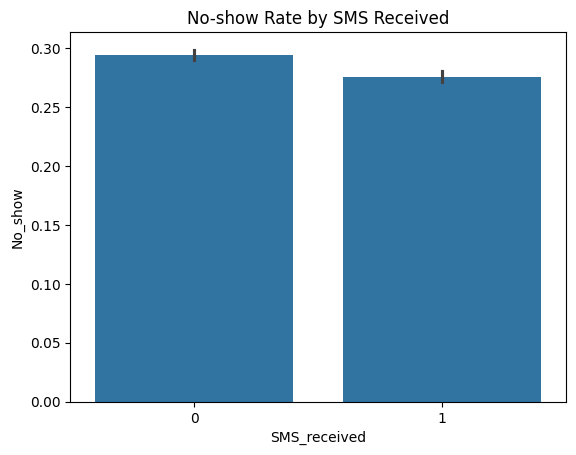

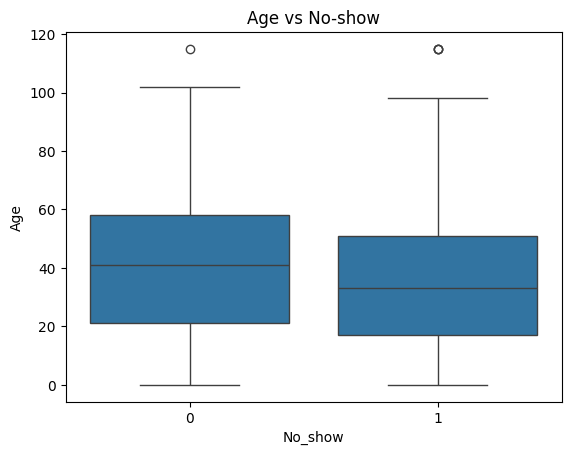

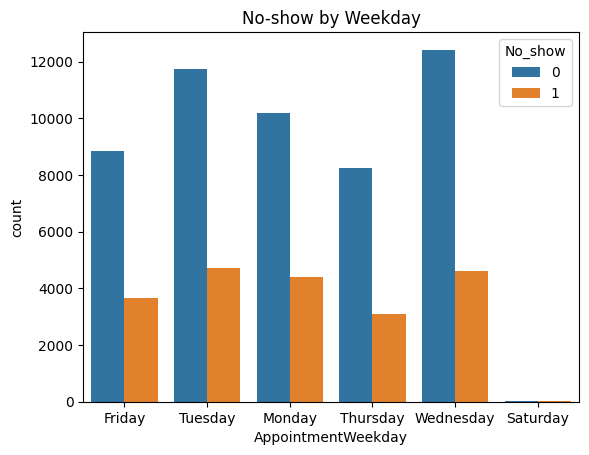

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# No-show by SMS
sns.barplot(x='SMS_received', y='No_show', data=df)
plt.title('No-show Rate by SMS Received')
plt.show()

# No-show by Age
sns.boxplot(x='No_show', y='Age', data=df)
plt.title('Age vs No-show')
plt.show()

# Weekday analysis
df['AppointmentWeekday'] = df['AppointmentDay'].dt.day_name()
sns.countplot(x='AppointmentWeekday', hue='No_show', data=df)
plt.title('No-show by Weekday')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Select features
features = ['Age', 'Gender', 'Scholarship', 'Diabetes', 'Alcoholism',
            'Handcap', 'SMS_received', 'WaitingDays']
X = df[features]
y = df['No_show']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10301
           1       0.51      0.01      0.02      4091

    accuracy                           0.72     14392
   macro avg       0.61      0.50      0.43     14392
weighted avg       0.66      0.72      0.60     14392



In [8]:
import pandas as pd

# Predict on all data
df['Predicted_No_show'] = model.predict(X)

# Save to Excel (separate columns)
with pd.ExcelWriter("no_show_predictions_output.xlsx") as writer:
    df.to_excel(writer, index=False, sheet_name='Predictions')


ValueError: Excel does not support datetimes with timezones. Please ensure that datetimes are timezone unaware before writing to Excel.